In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/flight-price-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/Freshly_cleaned.csv


In [91]:
# importing the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [92]:
# importing the dataset:

df = pd.read_csv('/kaggle/input/flight-price-prediction/Freshly_cleaned.csv')
df

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,93482,Vistara,Chennai,Hyderabad,69265,Business,1,31,3,UK-822,...,7,7,605,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300253,93483,Vistara,Chennai,Hyderabad,77105,Business,1,31,3,UK-826,...,7,7,625,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300254,93484,Vistara,Chennai,Hyderabad,79099,Business,1,31,3,UK-832,...,7,7,830,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300255,93485,Vistara,Chennai,Hyderabad,81585,Business,1,31,3,UK-828,...,7,7,600,1,1-Stop,1,Daytime Arrival,1,Daytime Departure,March


In [93]:
df.shape

(300257, 25)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300257 entries, 0 to 300256
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            300257 non-null  int64 
 1   airline               300257 non-null  object
 2   from                  300257 non-null  object
 3   to                    300257 non-null  object
 4   price                 300257 non-null  int64 
 5   class_category        300257 non-null  object
 6   class                 300257 non-null  int64 
 7   day                   300257 non-null  int64 
 8   month                 300257 non-null  int64 
 9   flight_no             300257 non-null  object
 10  route                 300257 non-null  object
 11  dep_hour              300257 non-null  int64 
 12  arr_hour              300257 non-null  int64 
 13  dep_period            300257 non-null  object
 14  arr_period            300257 non-null  object
 15  airline_index    

In [95]:
# statistical analysis:
df.describe(include = "all")

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
count,300257.000000,300257,300257,300257,300257.000000,300257,300257.000000,300257.000000,300257.000000,300257,...,300257.000000,300257.000000,300257.000000,300257.000000,300257,300257.000000,300257,300257.000000,300257,300257
unique,NaN,8,6,6,NaN,2,NaN,NaN,NaN,1569,...,NaN,NaN,NaN,NaN,3,NaN,2,NaN,2,2
top,NaN,Vistara,Delhi,Mumbai,NaN,Economy,NaN,NaN,NaN,UK-706,...,NaN,NaN,NaN,NaN,1-Stop,NaN,Daytime Arrival,NaN,Daytime Departure,March
freq,NaN,127859,61345,59108,NaN,206770,NaN,NaN,NaN,3235,...,NaN,NaN,NaN,NaN,250927,NaN,160226,NaN,220793,199672
mean,85749.995864,NaN,NaN,NaN,20883.926526,NaN,0.311357,17.384507,2.665004,NaN,...,3.741501,14.974002,733.074383,0.924205,NaN,0.533630,NaN,0.735347,NaN,NaN
std,58037.578497,NaN,NaN,NaN,22695.990185,NaN,0.463049,8.074000,0.471990,NaN,...,3.001990,8.835377,431.572124,0.398181,NaN,0.498869,NaN,0.441149,NaN,NaN
min,0.000000,NaN,NaN,NaN,1105.000000,NaN,0.000000,1.000000,2.000000,NaN,...,0.000000,0.000000,50.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,37532.000000,NaN,NaN,NaN,4783.000000,NaN,0.000000,12.000000,2.000000,NaN,...,0.000000,8.000000,405.000000,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
50%,75064.000000,NaN,NaN,NaN,7425.000000,NaN,0.000000,18.000000,3.000000,NaN,...,3.000000,14.000000,675.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,131708.000000,NaN,NaN,NaN,42521.000000,NaN,1.000000,24.000000,3.000000,NaN,...,7.000000,23.000000,970.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN


In [96]:
df

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,93482,Vistara,Chennai,Hyderabad,69265,Business,1,31,3,UK-822,...,7,7,605,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300253,93483,Vistara,Chennai,Hyderabad,77105,Business,1,31,3,UK-826,...,7,7,625,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300254,93484,Vistara,Chennai,Hyderabad,79099,Business,1,31,3,UK-832,...,7,7,830,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300255,93485,Vistara,Chennai,Hyderabad,81585,Business,1,31,3,UK-828,...,7,7,600,1,1-Stop,1,Daytime Arrival,1,Daytime Departure,March


In [97]:
## identification f null values:
df.isnull().sum()

Unnamed: 0              0
airline                 0
from                    0
to                      0
price                   0
class_category          0
class                   0
day                     0
month                   0
flight_no               0
route                   0
dep_hour                0
arr_hour                0
dep_period              0
arr_period              0
airline_index           0
route_index             0
duration_in_min         0
stops                   0
stops_category          0
arr_daytime             0
arr_daytime_category    0
dep_daytime             0
dep_daytime_category    0
month_category          0
dtype: int64

In [98]:
## detection of outliers:

# list of numerical features:

num = df.select_dtypes("number").columns
num

Index(['Unnamed: 0', 'price', 'class', 'day', 'month', 'dep_hour', 'arr_hour',
       'airline_index', 'route_index', 'duration_in_min', 'stops',
       'arr_daytime', 'dep_daytime'],
      dtype='object')

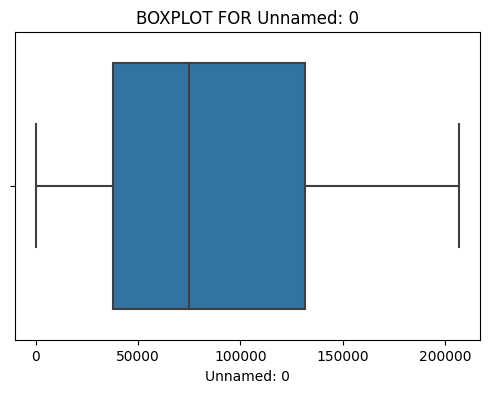

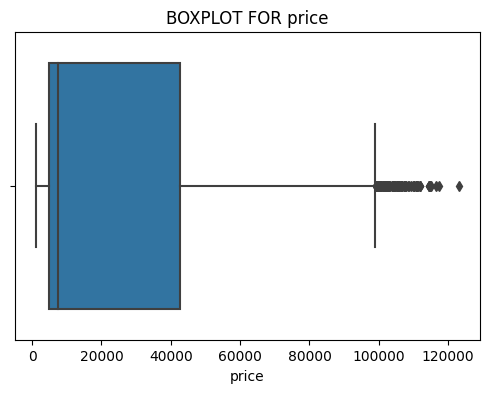

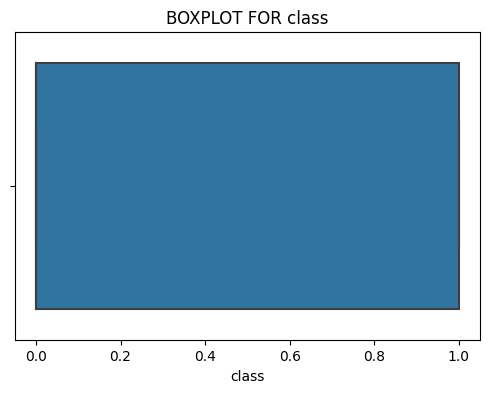

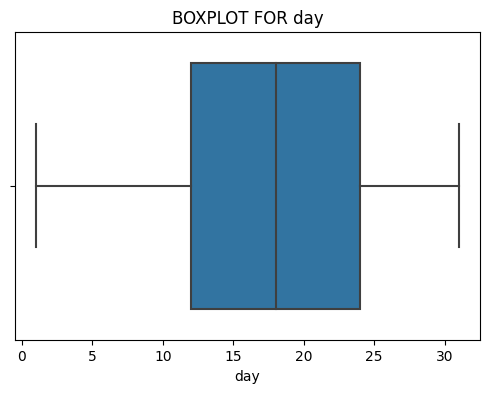

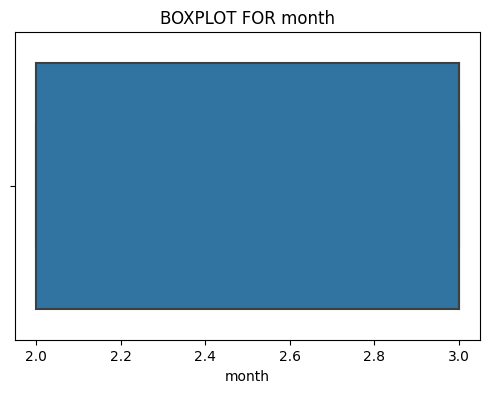

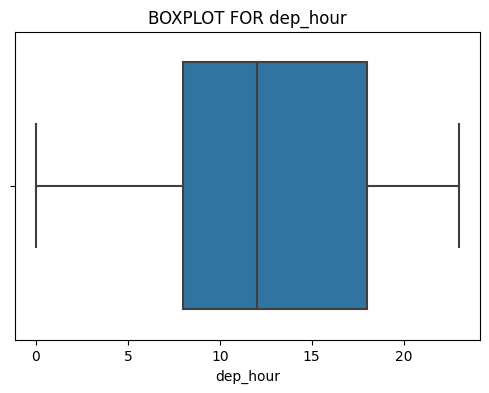

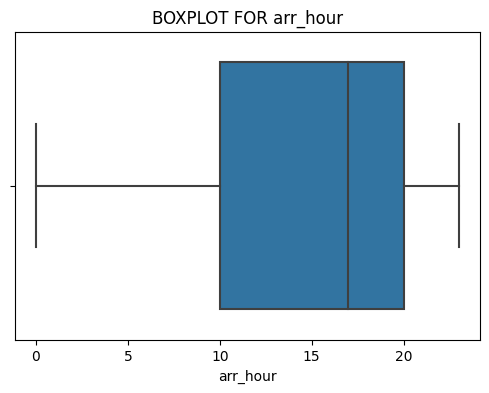

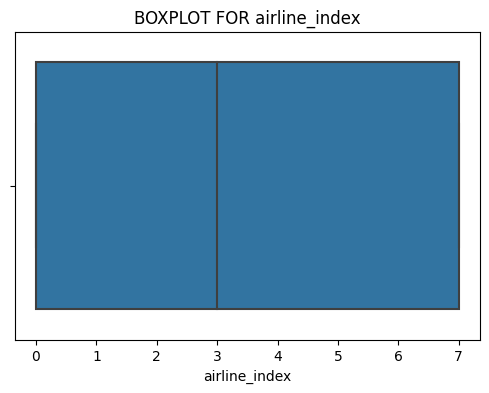

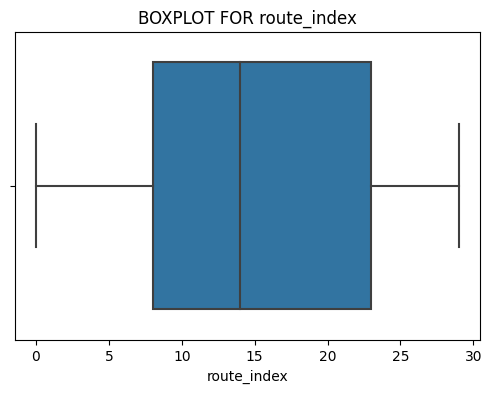

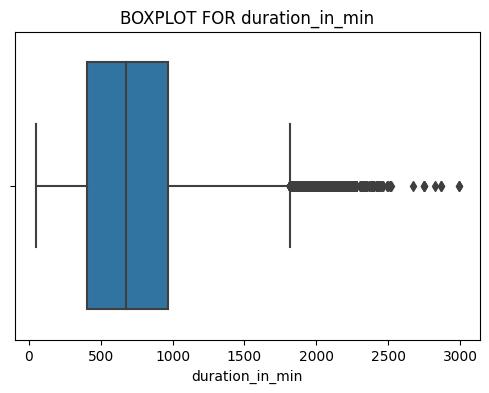

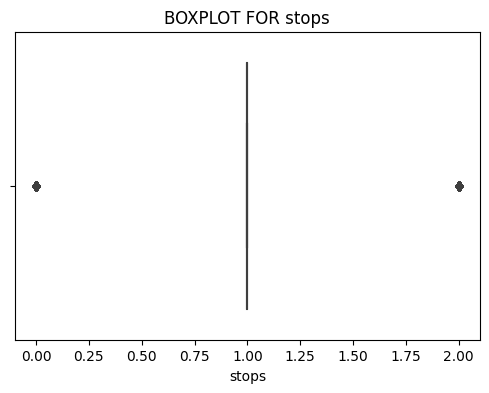

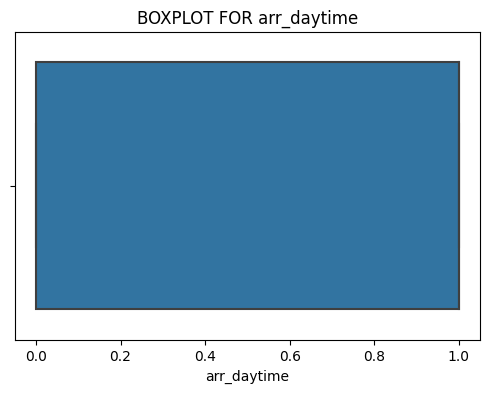

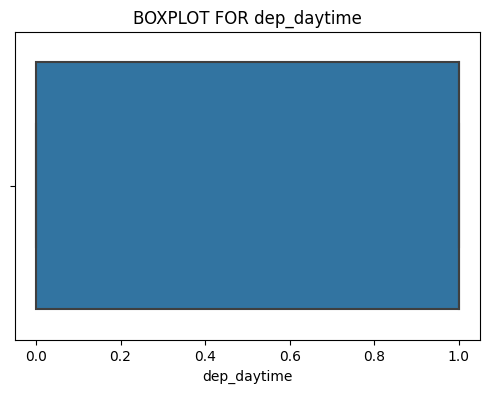

In [99]:
# boxplot for detection of outliers:


for column in num:
    plt.figure(figsize = (6,4))
    sns.boxplot(data = df, x = column)
    plt.title(f"BOXPLOT FOR {column}")
    plt.show()

In [100]:
## removal of outliers:

# first and third quartiles:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
# interquartile range:
IQR = Q3 - Q1
# lower and upper bounds:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# removal of outliers:
df1 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [101]:
df1.shape

(300257, 25)

In [102]:
df = df1

In [103]:
# drop the unnamed column:

df.drop("Unnamed: 0", axis =1, inplace=True)

# Data Visualization:

In [104]:
df

,airline,from,to,price,class_category,class,day,month,flight_no,route,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,Delhi-Mumbai,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,Delhi-Mumbai,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,Delhi-Mumbai,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,Delhi-Mumbai,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,Delhi-Mumbai,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,Vistara,Chennai,Hyderabad,69265,Business,1,31,3,UK-822,Chennai-Hyderabad,...,7,7,605,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300253,Vistara,Chennai,Hyderabad,77105,Business,1,31,3,UK-826,Chennai-Hyderabad,...,7,7,625,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300254,Vistara,Chennai,Hyderabad,79099,Business,1,31,3,UK-832,Chennai-Hyderabad,...,7,7,830,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300255,Vistara,Chennai,Hyderabad,81585,Business,1,31,3,UK-828,Chennai-Hyderabad,...,7,7,600,1,1-Stop,1,Daytime Arrival,1,Daytime Departure,March


In [105]:
## unique values of each feature:
df.nunique()

airline                     8
from                        6
to                          6
price                   12165
class_category              2
class                       2
day                        31
month                       2
flight_no                1569
route                      30
dep_hour                   24
arr_hour                   24
dep_period                  4
arr_period                  4
airline_index               8
route_index                30
duration_in_min           476
stops                       3
stops_category              3
arr_daytime                 2
arr_daytime_category        2
dep_daytime                 2
dep_daytime_category        2
month_category              2
dtype: int64

In [106]:
## value counts of each feature:

airline=df["airline"].value_counts()
airline

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23173
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

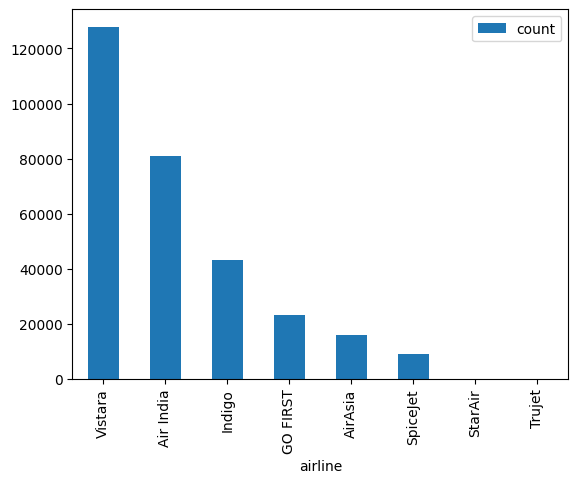

In [107]:
airline.plot(kind = "bar")
plt.legend()
plt.show()

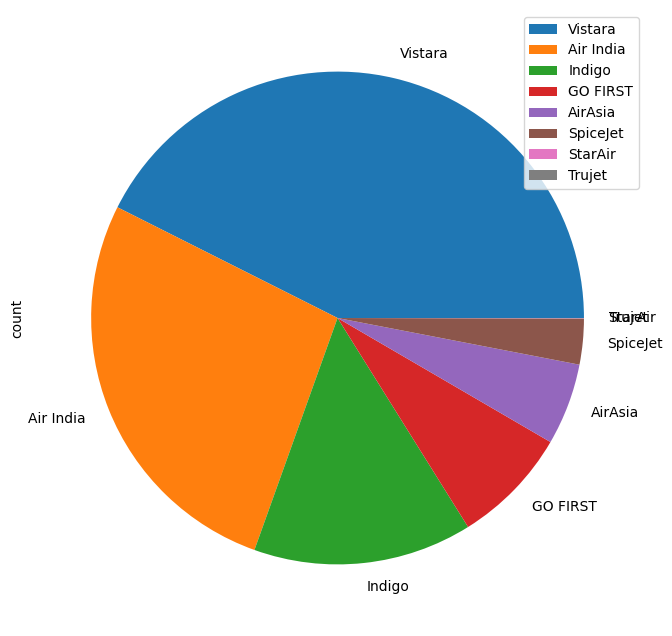

In [108]:
plt.figure(figsize=(10,8))
airline.plot(kind = "pie")
plt.legend()
plt.show()

In [109]:
df["price"].value_counts()

price
54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
16698       1
16802       1
16901       1
22306       1
16172       1
Name: count, Length: 12165, dtype: int64

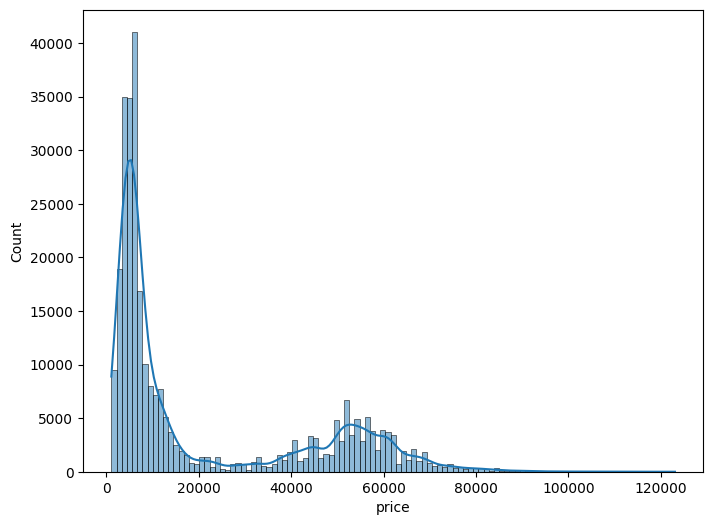

In [110]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = df["price"], kde = True)
plt.show()

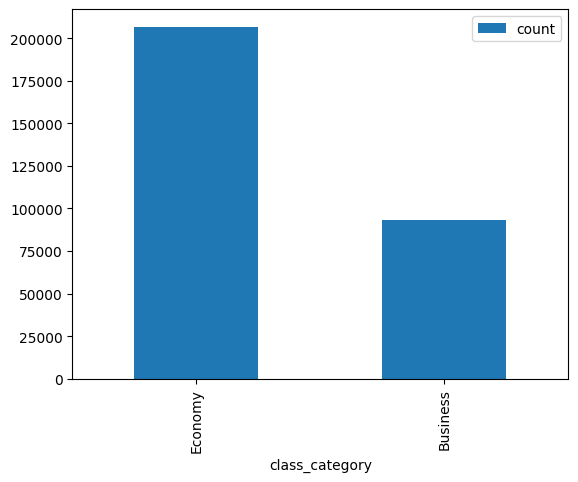

In [111]:
df["class_category"].value_counts().plot(kind="bar")
plt.legend()
plt.show()

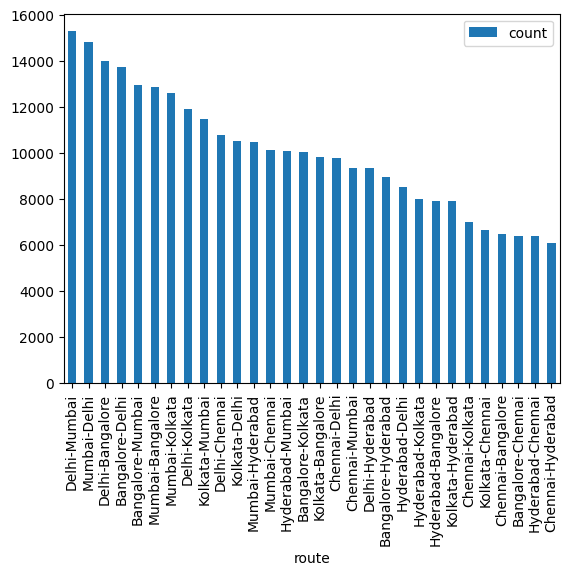

In [112]:
df["route"].value_counts().plot(kind = "bar")
plt.legend()
plt.show()

In [113]:
df["duration_in_min"].value_counts()

duration_in_min
130     4242
135     4036
165     2879
125     2755
170     2324
        ... 
2495       1
2465       1
2355       1
2670       1
2490       1
Name: count, Length: 476, dtype: int64

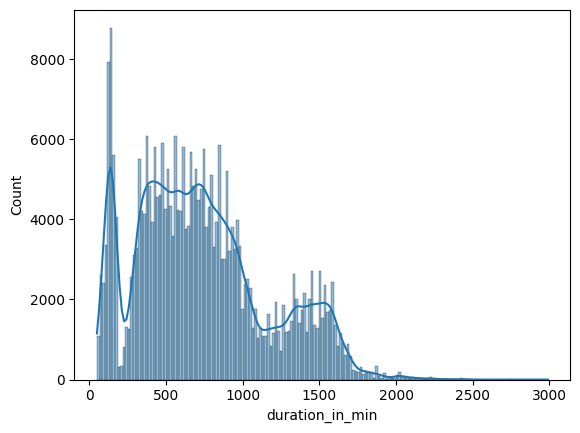

In [114]:
sns.histplot(data = df, x = df["duration_in_min"], kde=True)
plt.show()

<Axes: xlabel='stops_category'>

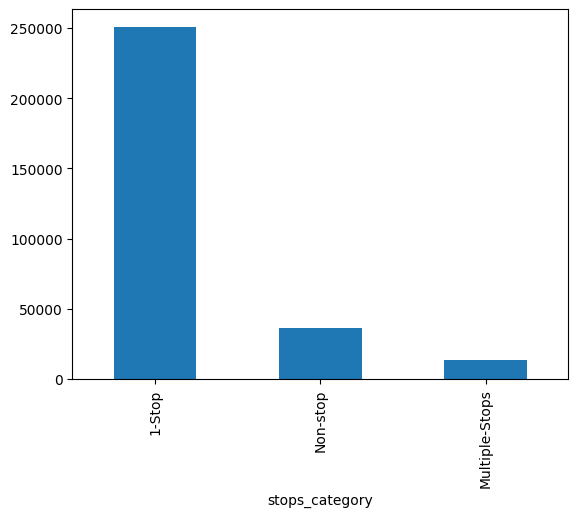

In [115]:
df["stops_category"].value_counts().plot(kind = "bar")

In [116]:
df["from"].value_counts()

from
Delhi        61345
Mumbai       60903
Bangalore    52103
Kolkata      46347
Hyderabad    40859
Chennai      38700
Name: count, dtype: int64

Text(0.5, 1.0, 'Takeoff From')

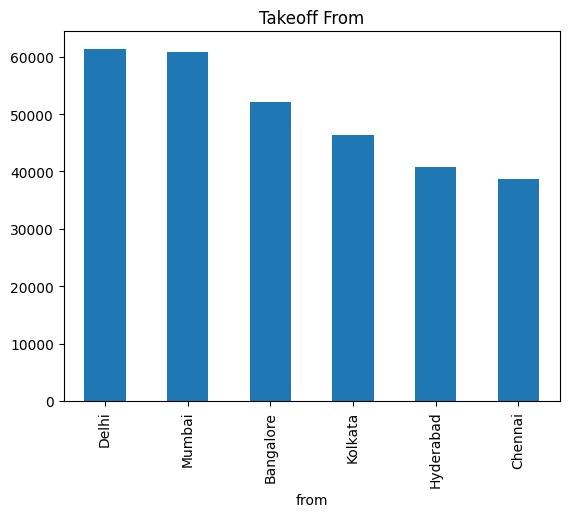

In [117]:
df["from"].value_counts().plot(kind = "bar")
plt.title("Takeoff From")

In [118]:
df["to"].value_counts()

to
Mumbai       59108
Delhi        57360
Bangalore    51112
Kolkata      49534
Hyderabad    42775
Chennai      40368
Name: count, dtype: int64

In [119]:
new_df = df[["route", "class_category", "stops_category"]]
new_df

,route,class_category,stops_category
0,Delhi-Mumbai,Economy,Non-stop
1,Delhi-Mumbai,Economy,Non-stop
2,Delhi-Mumbai,Economy,Non-stop
3,Delhi-Mumbai,Economy,Non-stop
4,Delhi-Mumbai,Economy,Non-stop
...,...,...,...
300252,Chennai-Hyderabad,Business,1-Stop
300253,Chennai-Hyderabad,Business,1-Stop
300254,Chennai-Hyderabad,Business,1-Stop
300255,Chennai-Hyderabad,Business,1-Stop


In [120]:
new = df.groupby("class_category")
print(new)

In [121]:
## list of numerical features:

num=df.select_dtypes("number").columns
num

Index(['price', 'class', 'day', 'month', 'dep_hour', 'arr_hour',
       'airline_index', 'route_index', 'duration_in_min', 'stops',
       'arr_daytime', 'dep_daytime'],
      dtype='object')

In [122]:
df_cor=df[['price', 'class', 'day', 'month', 'dep_hour', 'arr_hour',
       'airline_index', 'route_index', 'duration_in_min', 'stops',
       'arr_daytime', 'dep_daytime']]

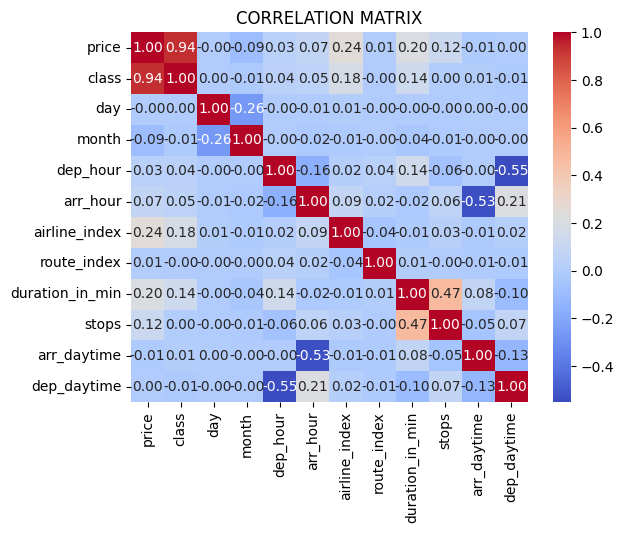

In [123]:
## correlation matrix:

sns.heatmap(data = df_cor.corr(), annot = True, fmt = ".2f", cmap="coolwarm")
plt.title("CORRELATION MATRIX")
plt.show()

In [124]:
df.columns

Index(['airline', 'from', 'to', 'price', 'class_category', 'class', 'day',
       'month', 'flight_no', 'route', 'dep_hour', 'arr_hour', 'dep_period',
       'arr_period', 'airline_index', 'route_index', 'duration_in_min',
       'stops', 'stops_category', 'arr_daytime', 'arr_daytime_category',
       'dep_daytime', 'dep_daytime_category', 'month_category'],
      dtype='object')

In [125]:
dep_daytime_category=df["dep_daytime_category"].value_counts()

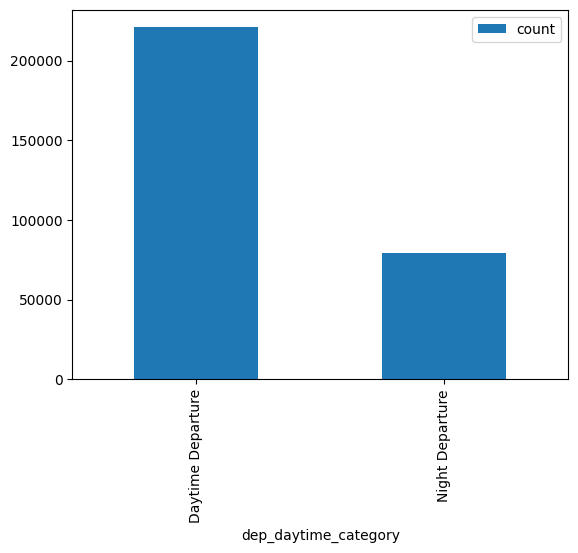

In [126]:
dep_daytime_category.plot(kind = "bar")
plt.legend()
plt.show()

In [127]:
df

,airline,from,to,price,class_category,class,day,month,flight_no,route,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,Delhi-Mumbai,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,Delhi-Mumbai,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,Delhi-Mumbai,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,Delhi-Mumbai,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,Delhi-Mumbai,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,Vistara,Chennai,Hyderabad,69265,Business,1,31,3,UK-822,Chennai-Hyderabad,...,7,7,605,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300253,Vistara,Chennai,Hyderabad,77105,Business,1,31,3,UK-826,Chennai-Hyderabad,...,7,7,625,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300254,Vistara,Chennai,Hyderabad,79099,Business,1,31,3,UK-832,Chennai-Hyderabad,...,7,7,830,1,1-Stop,0,Night Arrival,1,Daytime Departure,March
300255,Vistara,Chennai,Hyderabad,81585,Business,1,31,3,UK-828,Chennai-Hyderabad,...,7,7,600,1,1-Stop,1,Daytime Arrival,1,Daytime Departure,March


In [128]:
duration=df["duration_in_min"].value_counts()

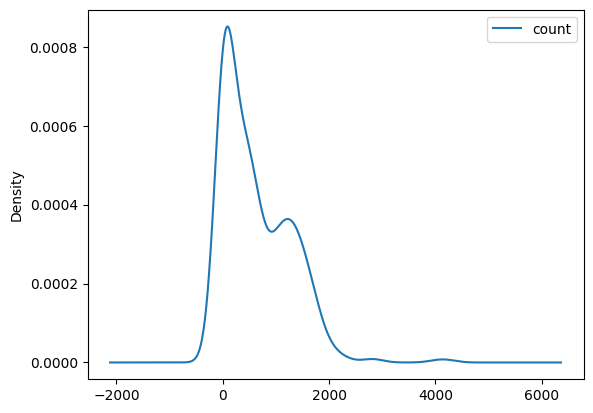

In [129]:
duration.plot(kind = "density")
plt.legend()
plt.show()

In [130]:
arrival=df["arr_daytime_category"].value_counts()

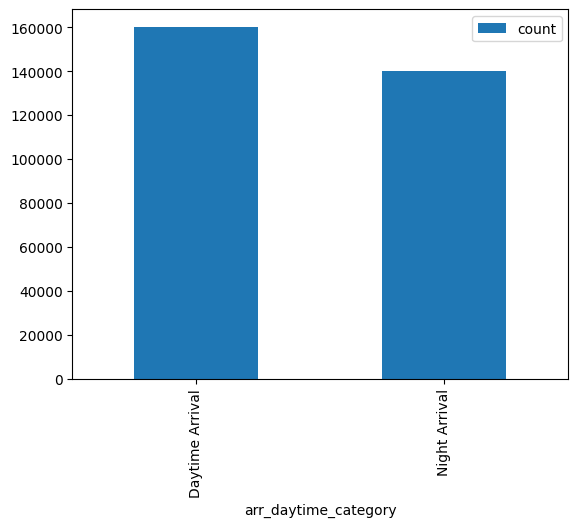

In [131]:
arrival.plot(kind="bar")
plt.legend()
plt.show()

In [132]:
dep_daytime=df["dep_daytime"].value_counts()

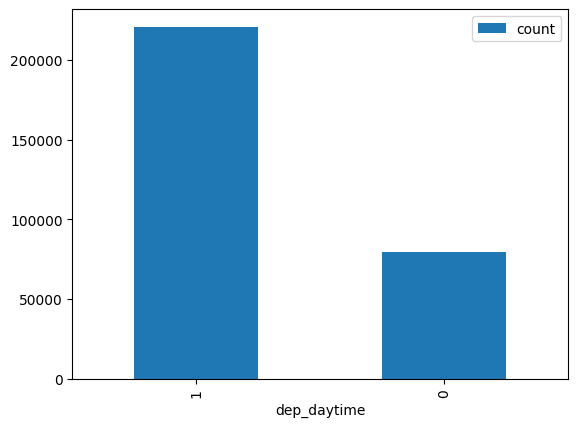

In [133]:
dep_daytime.plot(kind="bar")
plt.legend()
plt.show()

In [134]:
classs=df["class"].value_counts()

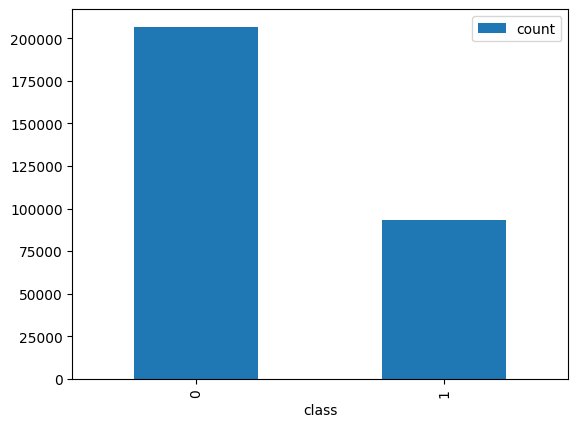

In [135]:
classs.plot(kind="bar")
plt.legend()
plt.show()

In [136]:
df["airline_index"].value_counts()

airline_index
7    127859
0     80894
3     43120
2     23173
1     16098
4      9011
5        61
6        41
Name: count, dtype: int64

# MODEL FITTING:

In [137]:
# checking for the cardinality of each feature:

df.nunique()

airline                     8
from                        6
to                          6
price                   12165
class_category              2
class                       2
day                        31
month                       2
flight_no                1569
route                      30
dep_hour                   24
arr_hour                   24
dep_period                  4
arr_period                  4
airline_index               8
route_index                30
duration_in_min           476
stops                       3
stops_category              3
arr_daytime                 2
arr_daytime_category        2
dep_daytime                 2
dep_daytime_category        2
month_category              2
dtype: int64

In [138]:
## remove the unnecessary features with high cardinality and less relevancy:

df.drop(columns=["flight_no", "route_index", "route", "dep_daytime", "stops", "from", "to", "class", "dep_hour", "arr_hour", "day", "month", "airline_index"], axis=1, inplace=True)

In [139]:
df

,airline,price,class_category,dep_period,arr_period,duration_in_min,stops_category,arr_daytime,arr_daytime_category,dep_daytime_category,month_category
0,SpiceJet,5953,Economy,Afternoon,Night,130,Non-stop,0,Night Arrival,Daytime Departure,February
1,SpiceJet,5953,Economy,Early_morning,Morning,140,Non-stop,1,Daytime Arrival,Daytime Departure,February
2,AirAsia,5956,Economy,Early_morning,Early_morning,130,Non-stop,1,Daytime Arrival,Night Departure,February
3,Vistara,5955,Economy,Morning,Morning,135,Non-stop,1,Daytime Arrival,Daytime Departure,February
4,Vistara,5955,Economy,Morning,Morning,140,Non-stop,1,Daytime Arrival,Daytime Departure,February
...,...,...,...,...,...,...,...,...,...,...,...
300252,Vistara,69265,Business,Morning,Night,605,1-Stop,0,Night Arrival,Daytime Departure,March
300253,Vistara,77105,Business,Morning,Night,625,1-Stop,0,Night Arrival,Daytime Departure,March
300254,Vistara,79099,Business,Morning,Night,830,1-Stop,0,Night Arrival,Daytime Departure,March
300255,Vistara,81585,Business,Morning,Afternoon,600,1-Stop,1,Daytime Arrival,Daytime Departure,March


In [140]:
df.drop("arr_daytime", axis = 1, inplace=True)
df.drop("month_category", axis = 1, inplace=True)

In [141]:
df

,airline,price,class_category,dep_period,arr_period,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category
0,SpiceJet,5953,Economy,Afternoon,Night,130,Non-stop,Night Arrival,Daytime Departure
1,SpiceJet,5953,Economy,Early_morning,Morning,140,Non-stop,Daytime Arrival,Daytime Departure
2,AirAsia,5956,Economy,Early_morning,Early_morning,130,Non-stop,Daytime Arrival,Night Departure
3,Vistara,5955,Economy,Morning,Morning,135,Non-stop,Daytime Arrival,Daytime Departure
4,Vistara,5955,Economy,Morning,Morning,140,Non-stop,Daytime Arrival,Daytime Departure
...,...,...,...,...,...,...,...,...,...
300252,Vistara,69265,Business,Morning,Night,605,1-Stop,Night Arrival,Daytime Departure
300253,Vistara,77105,Business,Morning,Night,625,1-Stop,Night Arrival,Daytime Departure
300254,Vistara,79099,Business,Morning,Night,830,1-Stop,Night Arrival,Daytime Departure
300255,Vistara,81585,Business,Morning,Afternoon,600,1-Stop,Daytime Arrival,Daytime Departure


# FEATURE SCALING:

In [142]:
scalar=StandardScaler()

In [143]:
num = df.select_dtypes("number").columns
num

Index(['price', 'duration_in_min'], dtype='object')

In [144]:
df[['price', 'duration_in_min']] = scalar.fit_transform(df[['price', 'duration_in_min']])

In [145]:
df

,airline,price,class_category,dep_period,arr_period,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category
0,SpiceJet,-0.657867,Economy,Afternoon,Night,-1.397392,Non-stop,Night Arrival,Daytime Departure
1,SpiceJet,-0.657867,Economy,Early_morning,Morning,-1.374221,Non-stop,Daytime Arrival,Daytime Departure
2,AirAsia,-0.657735,Economy,Early_morning,Early_morning,-1.397392,Non-stop,Daytime Arrival,Night Departure
3,Vistara,-0.657779,Economy,Morning,Morning,-1.385806,Non-stop,Daytime Arrival,Daytime Departure
4,Vistara,-0.657779,Economy,Morning,Morning,-1.374221,Non-stop,Daytime Arrival,Daytime Departure
...,...,...,...,...,...,...,...,...,...
300252,Vistara,2.131705,Business,Morning,Night,-0.296763,1-Stop,Night Arrival,Daytime Departure
300253,Vistara,2.477141,Business,Morning,Night,-0.250421,1-Stop,Night Arrival,Daytime Departure
300254,Vistara,2.564998,Business,Morning,Night,0.224588,1-Stop,Night Arrival,Daytime Departure
300255,Vistara,2.674533,Business,Morning,Afternoon,-0.308348,1-Stop,Daytime Arrival,Daytime Departure


# ENCODING OF CATEGORICAL FEATURES:

In [146]:
# list od categorical features:
df.select_dtypes("object").columns

Index(['airline', 'class_category', 'dep_period', 'arr_period',
       'stops_category', 'arr_daytime_category', 'dep_daytime_category'],
      dtype='object')

In [147]:
encoder=OneHotEncoder()

In [148]:
encoded = encoder.fit_transform(df[['airline', 'class_category', 'dep_period', 'arr_period',
       'stops_category', 'arr_daytime_category', 'dep_daytime_category']])

In [149]:
encoded.toarray()

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [150]:
df1 = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())

In [151]:
df1

,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,class_category_Business,class_category_Economy,...,arr_period_Early_morning,arr_period_Morning,arr_period_Night,stops_category_1-Stop,stops_category_Multiple-Stops,stops_category_Non-stop,arr_daytime_category_Daytime Arrival,arr_daytime_category_Night Arrival,dep_daytime_category_Daytime Departure,dep_daytime_category_Night Departure
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
df.drop(['airline', 'class_category', 'dep_period', 'arr_period','stops_category', 'arr_daytime_category', 'dep_daytime_category'], axis=1,inplace=True)

In [153]:
df

,price,duration_in_min
0,-0.657867,-1.397392
1,-0.657867,-1.374221
2,-0.657735,-1.397392
3,-0.657779,-1.385806
4,-0.657779,-1.374221
...,...,...
300252,2.131705,-0.296763
300253,2.477141,-0.250421
300254,2.564998,0.224588
300255,2.674533,-0.308348


In [154]:
df_new = pd.concat([df, df1], axis=1)

In [155]:
df_new

,price,duration_in_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,...,arr_period_Early_morning,arr_period_Morning,arr_period_Night,stops_category_1-Stop,stops_category_Multiple-Stops,stops_category_Non-stop,arr_daytime_category_Daytime Arrival,arr_daytime_category_Night Arrival,dep_daytime_category_Daytime Departure,dep_daytime_category_Night Departure
0,-0.657867,-1.397392,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.657867,-1.374221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,-0.657735,-1.397392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,-0.657779,-1.385806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.657779,-1.374221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,2.131705,-0.296763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300253,2.477141,-0.250421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300254,2.564998,0.224588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
300255,2.674533,-0.308348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [156]:
df=df_new

# TRAIN-TEST SPLIT:

In [157]:
X=df.drop("price", axis=1)

In [158]:
y=df["price"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [160]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240205, 26), (60052, 26), (240205,), (60052,))

# MODEL FITTING:

In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [162]:
# calculation of predicted values:

y_pred=model.predict(X_test)
y_pred

array([ 1.09712799, -0.46134081, -0.5800025 , ..., -0.44037111,
       -0.49828129,  1.46404179])

# MODEL EVALUATION METRICS:

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
mean_absolute_error(y_test, y_pred)

0.21679847838361965

In [165]:
mean_squared_error(y_test, y_pred)

0.09942877360701192

In [166]:
r2_score(y_test, y_pred)

0.9010437319644766